In [1]:

# Author: Hacer Aflaz
# Insurance Cost Prediction


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Acunmedya/10.hafta/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# I'll explore the data with those codes.
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


There is no missing value among the variables.

Most probably, charges feature has outliers due to standard deviation.

In [3]:
# I'll determine the categorical and numerical variables.

# Loop through all columns in the dataset and collect those
# whose data type is 'object' — typically indicating categorical or string variables.
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

display(categorical_features)
display(numerical_features)

['sex', 'smoker', 'region']

['age', 'bmi', 'children', 'charges']

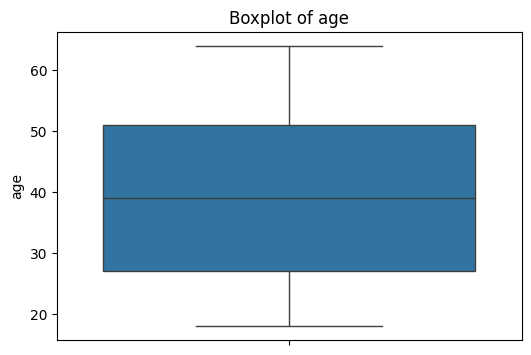

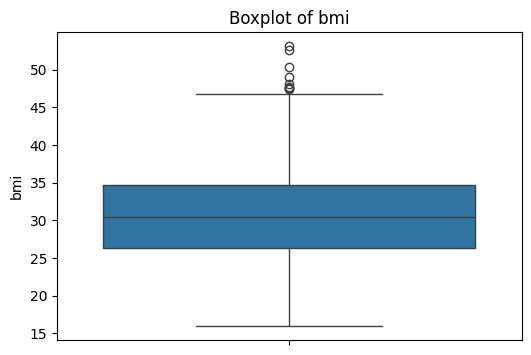

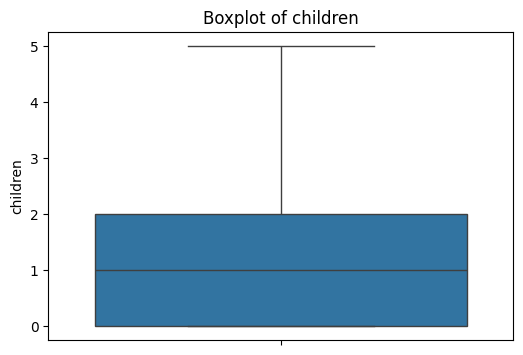

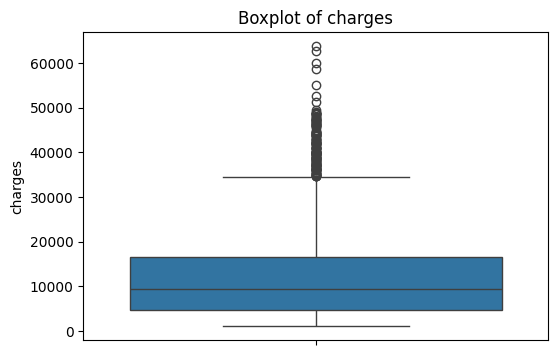

In [4]:
# Loop through each numerical feature to create individual boxplots
for feature in numerical_features:
    plt.figure(figsize=(6, 4))  # Set figure size for better readability
    sns.boxplot(y=df[feature])  # Draw vertical boxplot
    plt.title(f'Boxplot of {feature}')  # Add title with feature name
    plt.show()  # Display the plot

In [5]:
# Perform one-hot encoding on categorical features
# This will convert each category into a separate binary column (0 or 1)
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Explanation:
# - df: original DataFrame
# - columns=categorical_features: apply encoding only to the identified categorical columns
# - drop_first=True: avoids multicollinearity by dropping the first category in each feature

# Display few rows of the encoded DataFrame
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


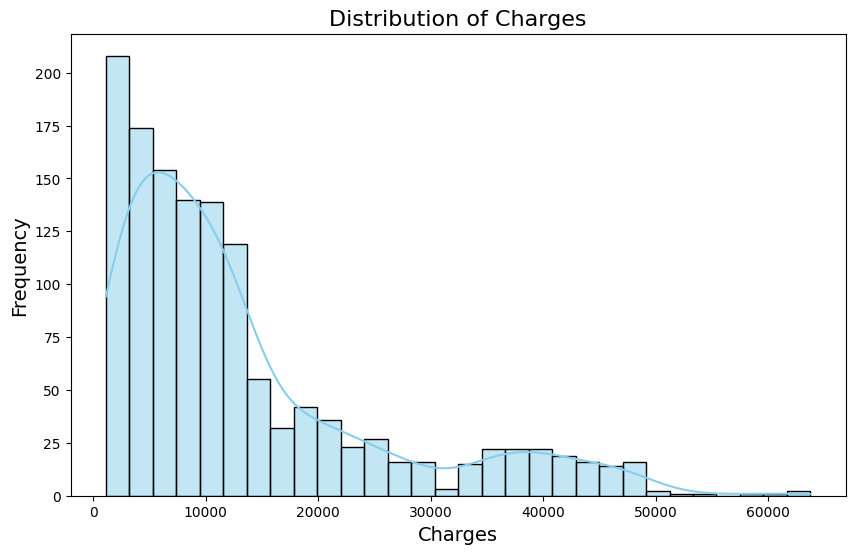

In [6]:
# Plot the distribution of the target variable 'charges'
plt.figure(figsize=(10, 6))

# Create a histogram for 'charges' with a density plot (KDE) overlaid
sns.histplot(df['charges'], kde=True, bins=30, color='skyblue')

# Add title and labels
plt.title('Distribution of Charges', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

Skew is observed. Logarithmic transformation is required.

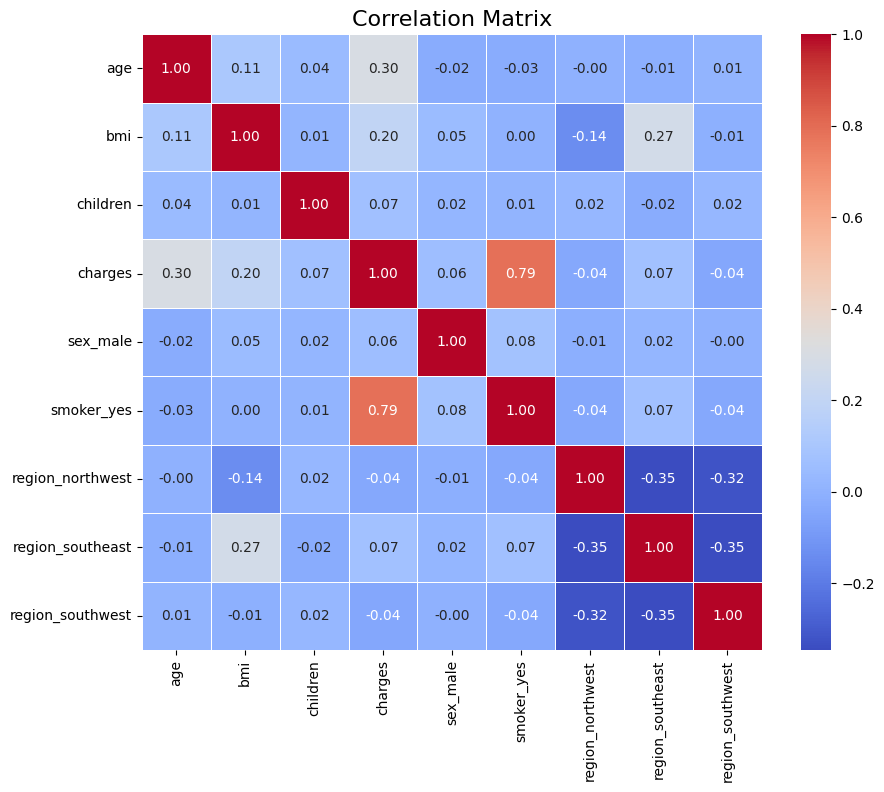

In [7]:
corr_matrix = df_encoded.corr(numeric_only=True)  # All columns are considered

# Set the figure size for better readability
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

Charges are mostly influenced by the people who smoke.

In [8]:
# 1. Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 2. Define independent (X) and dependent (y) variables
X = df_encoded.drop('charges', axis=1)  # All features except 'charges'
y = df_encoded['charges']              # Target variable

# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 4. Initialize the StandardScaler
scaler = StandardScaler()

# 5. Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train a Linear Regression model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 7. Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 9. Print evaluation results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 33596915.85
R² Score: 0.7836


MSE is too high. The errors should be optimized.

In [10]:
# 🔁 Apply log transformation to the target variable (y)
y_log = np.log(y)

# Split data into train/test sets (log-transformed y)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.20, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model on log-transformed y
model_log = LinearRegression()
model_log.fit(X_train_scaled, y_train_log)

# Predict on test data (output is in log space)
y_pred_log = model_log.predict(X_test_scaled)

# Evaluate model performance in log space (no back-transformation)
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print(f"MSE (log space): {mse_log:.4f}")
print(f"R² (log space): {r2_log:.4f}")

MSE (log space): 0.1756
R² (log space): 0.8047


---
**Log Space**

MSE (log space): 0.1756

R² (log space): 0.8047



**Linear Regression**

Mean Squared Error (MSE): 33596915.85

R² Score: 0.7836


With log space, MSE is decreased obviously and also R² increases which means the model can generalized with rate of %80.

---

In [12]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. Scale features (important for polynomial regression)
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# 4. Train polynomial regression model
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

# 5. Make predictions
y_pred = model.predict(X_test_poly_scaled)

# 6. Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression (degree=2) Results:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Optional: Print coefficients
print("\nModel coefficients:", model.coef_)
print("Number of features created:", X_train_poly.shape[1])

Polynomial Regression (degree=2) Results:
MSE: 20712805.9879
R²: 0.8666

Model coefficients: [-1.52901020e+03  2.87121010e+03  1.71534991e+03 -5.99096203e+02
 -4.24704115e+03 -3.07622998e+02  1.79524035e+02 -1.47063459e+02
  4.46919062e+03  3.05393763e+02 -3.79949892e+02  3.89329030e+02
  6.21919904e+01  4.48124408e+02  9.37365749e+02  1.13041476e+03
 -2.68652990e+03  3.20462968e+02  2.77572302e+02  1.86656589e+04
 -3.48639703e+02 -1.84055559e+03 -1.31088121e+03 -3.68586559e+02
 -2.58627768e+02 -3.13230189e+02  3.91774746e+00 -3.12047498e+02
 -4.86846301e+02 -5.99096203e+02  8.35121488e+01  4.24512357e+02
  5.14112254e+02  2.17070488e+02 -4.24704115e+03 -1.26516861e+02
 -2.21641091e+02  2.87893640e+02 -3.07622998e+02  0.00000000e+00
  0.00000000e+00  1.79524035e+02  0.00000000e+00 -1.47063459e+02]
Number of features created: 44



Polynomial Regression Performance:
Degree    Train MSE      Test MSE       
1         37277681.7020  33596915.8514  
2         22831078.6763  20712805.9879  
3         20935299.4344  23498217.9989  
4         17950176.6991  38158498.3327  
5         13510709.5672  196174964.1988 

Optimal polynomial degree: 2
Lowest test MSE: 20712805.9879


<Figure size 1500x800 with 0 Axes>

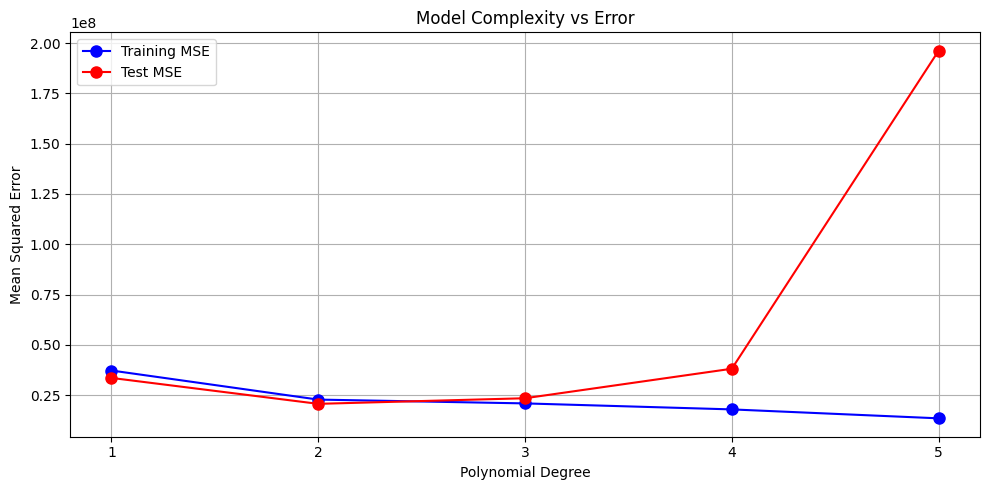

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store MSE values
train_mse = []
test_mse = []
degrees = range(1, 6)  # Test polynomial degrees 1 through 5

# Create figure for regression curves
plt.figure(figsize=(15, 8))

for i, degree in enumerate(degrees):
    # Create pipeline: Polynomial features -> Scaling -> Linear Regression
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

    # Plot regression curves (for single feature only)
    if X.shape[1] == 1:
        plt.subplot(2, 3, i+1)
        plt.scatter(X_train, y_train, color='blue', alpha=0.3, label='Training Data')
        plt.scatter(X_test, y_test, color='red', alpha=0.3, label='Test Data')

        # Create smooth curve for visualization
        x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_plot = model.predict(x_plot)
        plt.plot(x_plot, y_plot, color='black', linewidth=2,
                label=f'Degree {degree}\nTest MSE: {test_mse[i]:.2f}')

        plt.xlabel('Feature value')
        plt.ylabel('Target value')
        plt.title(f'Polynomial Degree {degree}')
        plt.legend()

# Print MSE results in a table
print("\nPolynomial Regression Performance:")
print(f"{'Degree':<10}{'Train MSE':<15}{'Test MSE':<15}")
for degree, tr_mse, te_mse in zip(degrees, train_mse, test_mse):
    print(f"{degree:<10}{tr_mse:<15.4f}{te_mse:<15.4f}")

# Plot MSE trends
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_mse, 'bo-', label='Training MSE', markersize=8)
plt.plot(degrees, test_mse, 'ro-', label='Test MSE', markersize=8)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity vs Error')
plt.xticks(degrees)
plt.grid(True)
plt.legend()

# Find optimal degree
optimal_degree = degrees[np.argmin(test_mse)]
print(f"\nOptimal polynomial degree: {optimal_degree}")
print(f"Lowest test MSE: {min(test_mse):.4f}")

plt.tight_layout()
plt.show()

In [11]:

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Create polynomial features (degree=2 for example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scale features (critical for regularized models)
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# 2. Train Ridge and Lasso models
ridge = Ridge(alpha=1.0)  # Alpha = regularization strength
lasso = Lasso(alpha=0.1)  # Adjust alpha via cross-validation

ridge.fit(X_train_poly_scaled, y_train)
lasso.fit(X_train_poly_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_poly_scaled)
y_pred_lasso = lasso.predict(X_test_poly_scaled)

# 3. Evaluate models
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}\n")

evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Ridge Regression:
  MSE: 20712378.2389
  R²: 0.8666

Lasso Regression:
  MSE: 20709883.2643
  R²: 0.8666



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.435e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(



Optimal Alpha Values:
Ridge: 1.151395
Lasso: 0.001000

Performance in Original Scale:
Ridge Regression:
  MSE: 22543231.3680
  R²: 0.8548
Lasso Regression:
  MSE: 23119229.0263
  R²: 0.8511


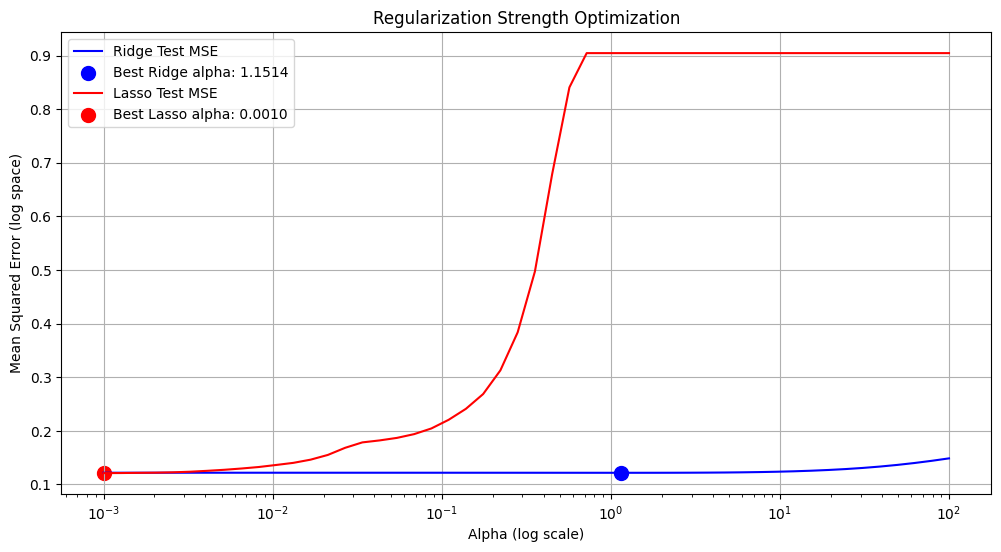

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

y_log = np.log(y)

# Split data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Create polynomial features (degree=2 example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Alpha values to test
alphas = np.logspace(-3, 2, 50)  # 0.001 to 100

def find_best_alpha(model_class, alphas):
    """Find optimal alpha for Ridge/Lasso regression"""
    test_mse = []
    for alpha in alphas:
        model = model_class(alpha=alpha)
        model.fit(X_train_scaled, y_train_log)
        y_pred = model.predict(X_test_scaled)
        test_mse.append(mean_squared_error(y_test_log, y_pred))

    best_idx = np.argmin(test_mse)
    return alphas[best_idx], test_mse[best_idx]

# Find best alphas
best_ridge_alpha, ridge_mse = find_best_alpha(Ridge, alphas)
best_lasso_alpha, lasso_mse = find_best_alpha(Lasso, alphas)

# Train final models with best alphas
ridge = Ridge(alpha=best_ridge_alpha)
lasso = Lasso(alpha=best_lasso_alpha)

ridge.fit(X_train_scaled, y_train_log)
lasso.fit(X_train_scaled, y_train_log)

# Make predictions (in log space)
y_pred_ridge_log = ridge.predict(X_test_scaled)
y_pred_lasso_log = lasso.predict(X_test_scaled)

# Back-transform to original scale
y_test_orig = np.exp(y_test_log)
y_pred_ridge_orig = np.exp(y_pred_ridge_log)
y_pred_lasso_orig = np.exp(y_pred_lasso_log)

# Calculate metrics in original scale
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    return mse, r2

print("\nOptimal Alpha Values:")
print(f"Ridge: {best_ridge_alpha:.6f}")
print(f"Lasso: {best_lasso_alpha:.6f}\n")

print("Performance in Original Scale:")
ridge_mse, ridge_r2 = evaluate_model("Ridge Regression", y_test_orig, y_pred_ridge_orig)
lasso_mse, lasso_r2 = evaluate_model("Lasso Regression", y_test_orig, y_pred_lasso_orig)

# Plot alpha selection
plt.figure(figsize=(12, 6))
for model_class, name, color in zip([Ridge, Lasso], ['Ridge', 'Lasso'], ['blue', 'red']):
    test_mse = []
    for alpha in alphas:
        model = model_class(alpha=alpha)
        model.fit(X_train_scaled, y_train_log)
        y_pred = model.predict(X_test_scaled)
        test_mse.append(mean_squared_error(y_test_log, y_pred))

    plt.semilogx(alphas, test_mse, color=color, label=f'{name} Test MSE')
    best_alpha = best_ridge_alpha if name == 'Ridge' else best_lasso_alpha
    plt.scatter(best_alpha, min(test_mse), color=color, s=100,
                label=f'Best {name} alpha: {best_alpha:.4f}')

plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (log space)')
plt.title('Regularization Strength Optimization')
plt.legend()
plt.grid(True)
plt.show()

1. **Linear Regression**

- Mean Squared Error (MSE): 33596915.85
- R² Score: 0.7836

2. **Log-Transformed Linear Regression**
- MSE (log space): 0.1756
- R² (log space): 0.8047

3. **Polynomial Regression (degree=2)**
- MSE: 20712805.9879
- R²: 0.8666

4. **Degree-Optimized Polynomial Regression**
- Optimal polynomial degree: 2
- Lowest test MSE: 20712805.9879

5. **Ridge/Lasso Polynomial Regression**
- Ridge Regression:
  MSE: 20712378.2389
  R²: 0.8666

- Lasso Regression:
  MSE: 20709883.2643
  R²: 0.8666

6. **Log-Transformed Polynomial Regression**
- Optimal Alpha Values:
Ridge: 1.151395
Lasso: 0.001000

- Performance in Original Scale:
 - Ridge Regression:
  MSE: 22543231.3680
  R²: 0.8548
 - Lasso Regression:
  MSE: 23119229.0263
  R²: 0.8511


---
Best result belongs to regularized(lasso) polynomial regression model. Because it has the lowest MSE.

Lasso prevented the overfitting with giving 0 to some features coefficients. Or Ridge prevented the overfitting with decreasing the coefficients so influence of them to the model.